In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
im =  cv2.imread(r"/Copy of IMG-20220819-WA0004.jpg") #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(1280, 960, 3)


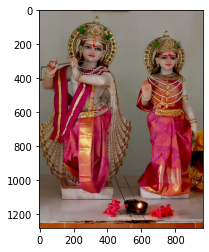

In [5]:
plt.imshow(im) # as RGB Format
plt.show()

In [6]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(1228800, 3)


In [7]:
from sklearn.cluster import KMeans

In [8]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [9]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=4)

In [10]:
centers = km.cluster_centers_

In [11]:
centers = np.array(centers,dtype='uint8')

In [12]:
print(centers)
ik=centers[1]

[[ 80  15   9]
 [160 142 129]
 [115  94  77]
 [169  44  54]]


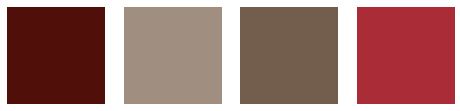

In [13]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [14]:
new_img = np.zeros((1280*960,3),dtype='uint8')

print(new_img.shape)

(1228800, 3)


In [15]:
colors

[array([80, 15,  9], dtype=uint8),
 array([160, 142, 129], dtype=uint8),
 array([115,  94,  77], dtype=uint8),
 array([169,  44,  54], dtype=uint8)]

In [16]:
km.labels_

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

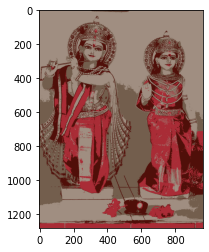

In [17]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    